In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('features.csv')
df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2012-11-09        61.24       3.314   11421.32    3370.89   
1      1  2012-11-16        52.92       3.252    9696.28     292.10   
2      1  2012-11-23        56.23       3.211     883.59       4.17   
3      1  2012-11-30        52.34       3.207    2460.03        NaN   
4      1  2012-12-07        64.12       3.198    6343.16        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0      40.28    4646.79    6154.16  223.481307         6.573      False  
1     103.78    1133.15    6612.69  223.512911         6.573      False  
2   74910.32     209.91     303.32  223.561947         6.573       True  
3    3838.35     150.57    6966.34  223.610984         6.573      False  
4     270.00    2928.90   10147.90  223.660021         6.573      False

In [3]:
df.describe()

Store  Temperature  Fuel_Price     MarkDown1     MarkDown2  \
count   10.0    10.000000   10.000000     10.000000      6.000000   
mean     1.0    52.860000    3.196000   6293.479000  13711.536667   
std      0.0     6.910884    0.065808   4213.079947  15255.691887   
min      1.0    41.730000    3.098000    883.590000      4.170000   
25%      1.0    49.247500    3.162750   2721.230000   1061.797500   
50%      1.0    52.630000    3.202500   6431.700000   9752.745000   
75%      1.0    56.177500    3.235000   9330.137500  23058.397500   
max      1.0    64.120000    3.314000  12659.550000  37101.130000   

          MarkDown3    MarkDown4     MarkDown5         CPI  Unemployment  
count     10.000000    10.000000     10.000000   10.000000     10.000000  
mean    7971.195000  1198.564000   4494.816000  223.762924      6.563400  
std    23549.206482  1511.967518   2979.976943    0.248610      0.020239  
min       12.170000    72.360000    303.320000  223.481307      6.525000  
25%       48.525000   165.405000   2793.205000  223.574207      6.573000  
50%      139.280000   566.350000   3970.635000  223.689649      6.573000  
75%      273.000000  1510.887500   6498.057500  223.930272      6.573000  
max    74910.320000  4646.790000  10147.900000  224.201552      6.573000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         10 non-null     int64  
 1   Date          10 non-null     object 
 2   Temperature   10 non-null     float64
 3   Fuel_Price    10 non-null     float64
 4   MarkDown1     10 non-null     float64
 5   MarkDown2     6 non-null      float64
 6   MarkDown3     10 non-null     float64
 7   MarkDown4     10 non-null     float64
 8   MarkDown5     10 non-null     float64
 9   CPI           10 non-null     float64
 10  Unemployment  10 non-null     float64
 11  IsHoliday     10 non-null     bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 1018.0+ bytes


In [5]:
df.corr()

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Store           NaN          NaN         NaN        NaN        NaN        NaN   
Temperature     NaN     1.000000    0.449868   0.188045  -0.832192   0.172595   
Fuel_Price      NaN     0.449868    1.000000   0.075656  -0.818237   0.081215   
MarkDown1       NaN     0.188045    0.075656   1.000000   0.168999  -0.468156   
MarkDown2       NaN    -0.832192   -0.818237   0.168999   1.000000  -0.439518   
MarkDown3       NaN     0.172595    0.081215  -0.468156  -0.439518   1.000000   
MarkDown4       NaN     0.679240    0.635214   0.392958  -0.458166  -0.243096   
MarkDown5       NaN     0.527563    0.445447   0.111060  -0.374131  -0.481101   
CPI             NaN    -0.644339   -0.450512  -0.065587   0.758288  -0.296843   
Unemployment    NaN     0.521259   -0.048053   0.303527  -0.357396   0.178096   
IsHoliday       NaN    -0.179219   -0.292324   0.059808   0.245804   0.661826   

              MarkDown4  MarkDown5       CPI  Unemployment  IsHoliday  
Store               NaN        NaN       NaN           NaN        NaN  
Temperature    0.679240   0.527563 -0.644339      0.521259  -0.179219  
Fuel_Price     0.635214   0.445447 -0.450512     -0.048053  -0.292324  
MarkDown1      0.392958   0.111060 -0.065587      0.303527   0.059808  
MarkDown2     -0.458166  -0.374131  0.758288     -0.357396   0.245804  
MarkDown3     -0.243096  -0.481101 -0.296843      0.178096   0.661826  
MarkDown4      1.000000   0.544769 -0.480285      0.270190  -0.368236  
MarkDown5      0.544769   1.000000 -0.330914      0.092708  -0.661241  
CPI           -0.480285  -0.330914  1.000000     -0.802078  -0.003696  
Unemployment   0.270190   0.092708 -0.802078      1.000000   0.250000  
IsHoliday     -0.368236  -0.661241 -0.003696      0.250000   1.000000

In [6]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [7]:
df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       4
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [8]:
df['MarkDown2'] = imputer_mean.fit_transform(df[['MarkDown2']])

df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [9]:
df.dropna(inplace=True)

df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [10]:
df.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1     MarkDown2  \
0      1  2012-11-09        61.24       3.314   11421.32   3370.890000   
1      1  2012-11-16        52.92       3.252    9696.28    292.100000   
2      1  2012-11-23        56.23       3.211     883.59      4.170000   
3      1  2012-11-30        52.34       3.207    2460.03  13711.536667   
4      1  2012-12-07        64.12       3.198    6343.16  13711.536667   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0      40.28    4646.79    6154.16  223.481307         6.573      False  
1     103.78    1133.15    6612.69  223.512911         6.573      False  
2   74910.32     209.91     303.32  223.561947         6.573       True  
3    3838.35     150.57    6966.34  223.610984         6.573      False  
4     270.00    2928.90   10147.90  223.660021         6.573      False

Gunakan salah satu tipe pendekatan pada Supervised Learning.

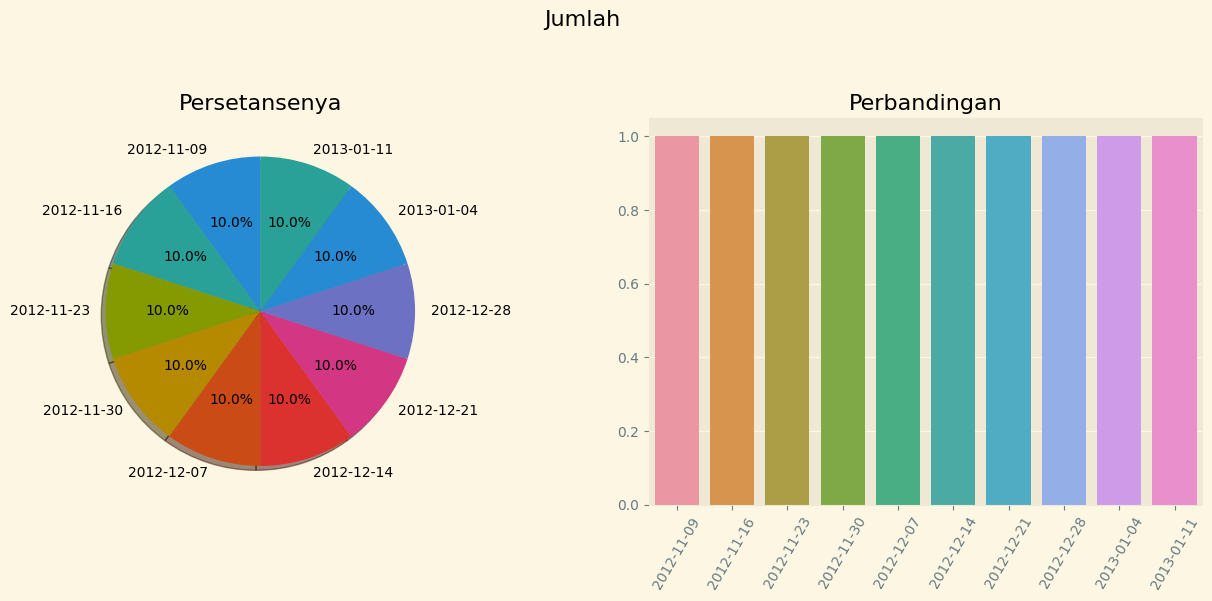

In [11]:
plt.style.use('Solarize_Light2')

Kategori = df["Date"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(Kategori['Date'],labels=Kategori['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetansenya")


X_index = list(Kategori['index'])
y_species = list(Kategori['Date'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan")

fig.subplots_adjust(top=0.8)
plt.xticks(rotation=60)
plt.suptitle("Jumlah",size=16)
plt.show()


Gunakan minimal 2 algoritma untuk membandingkan score/hasil terbaiknya.

<Figure size 2000x1500 with 0 Axes>

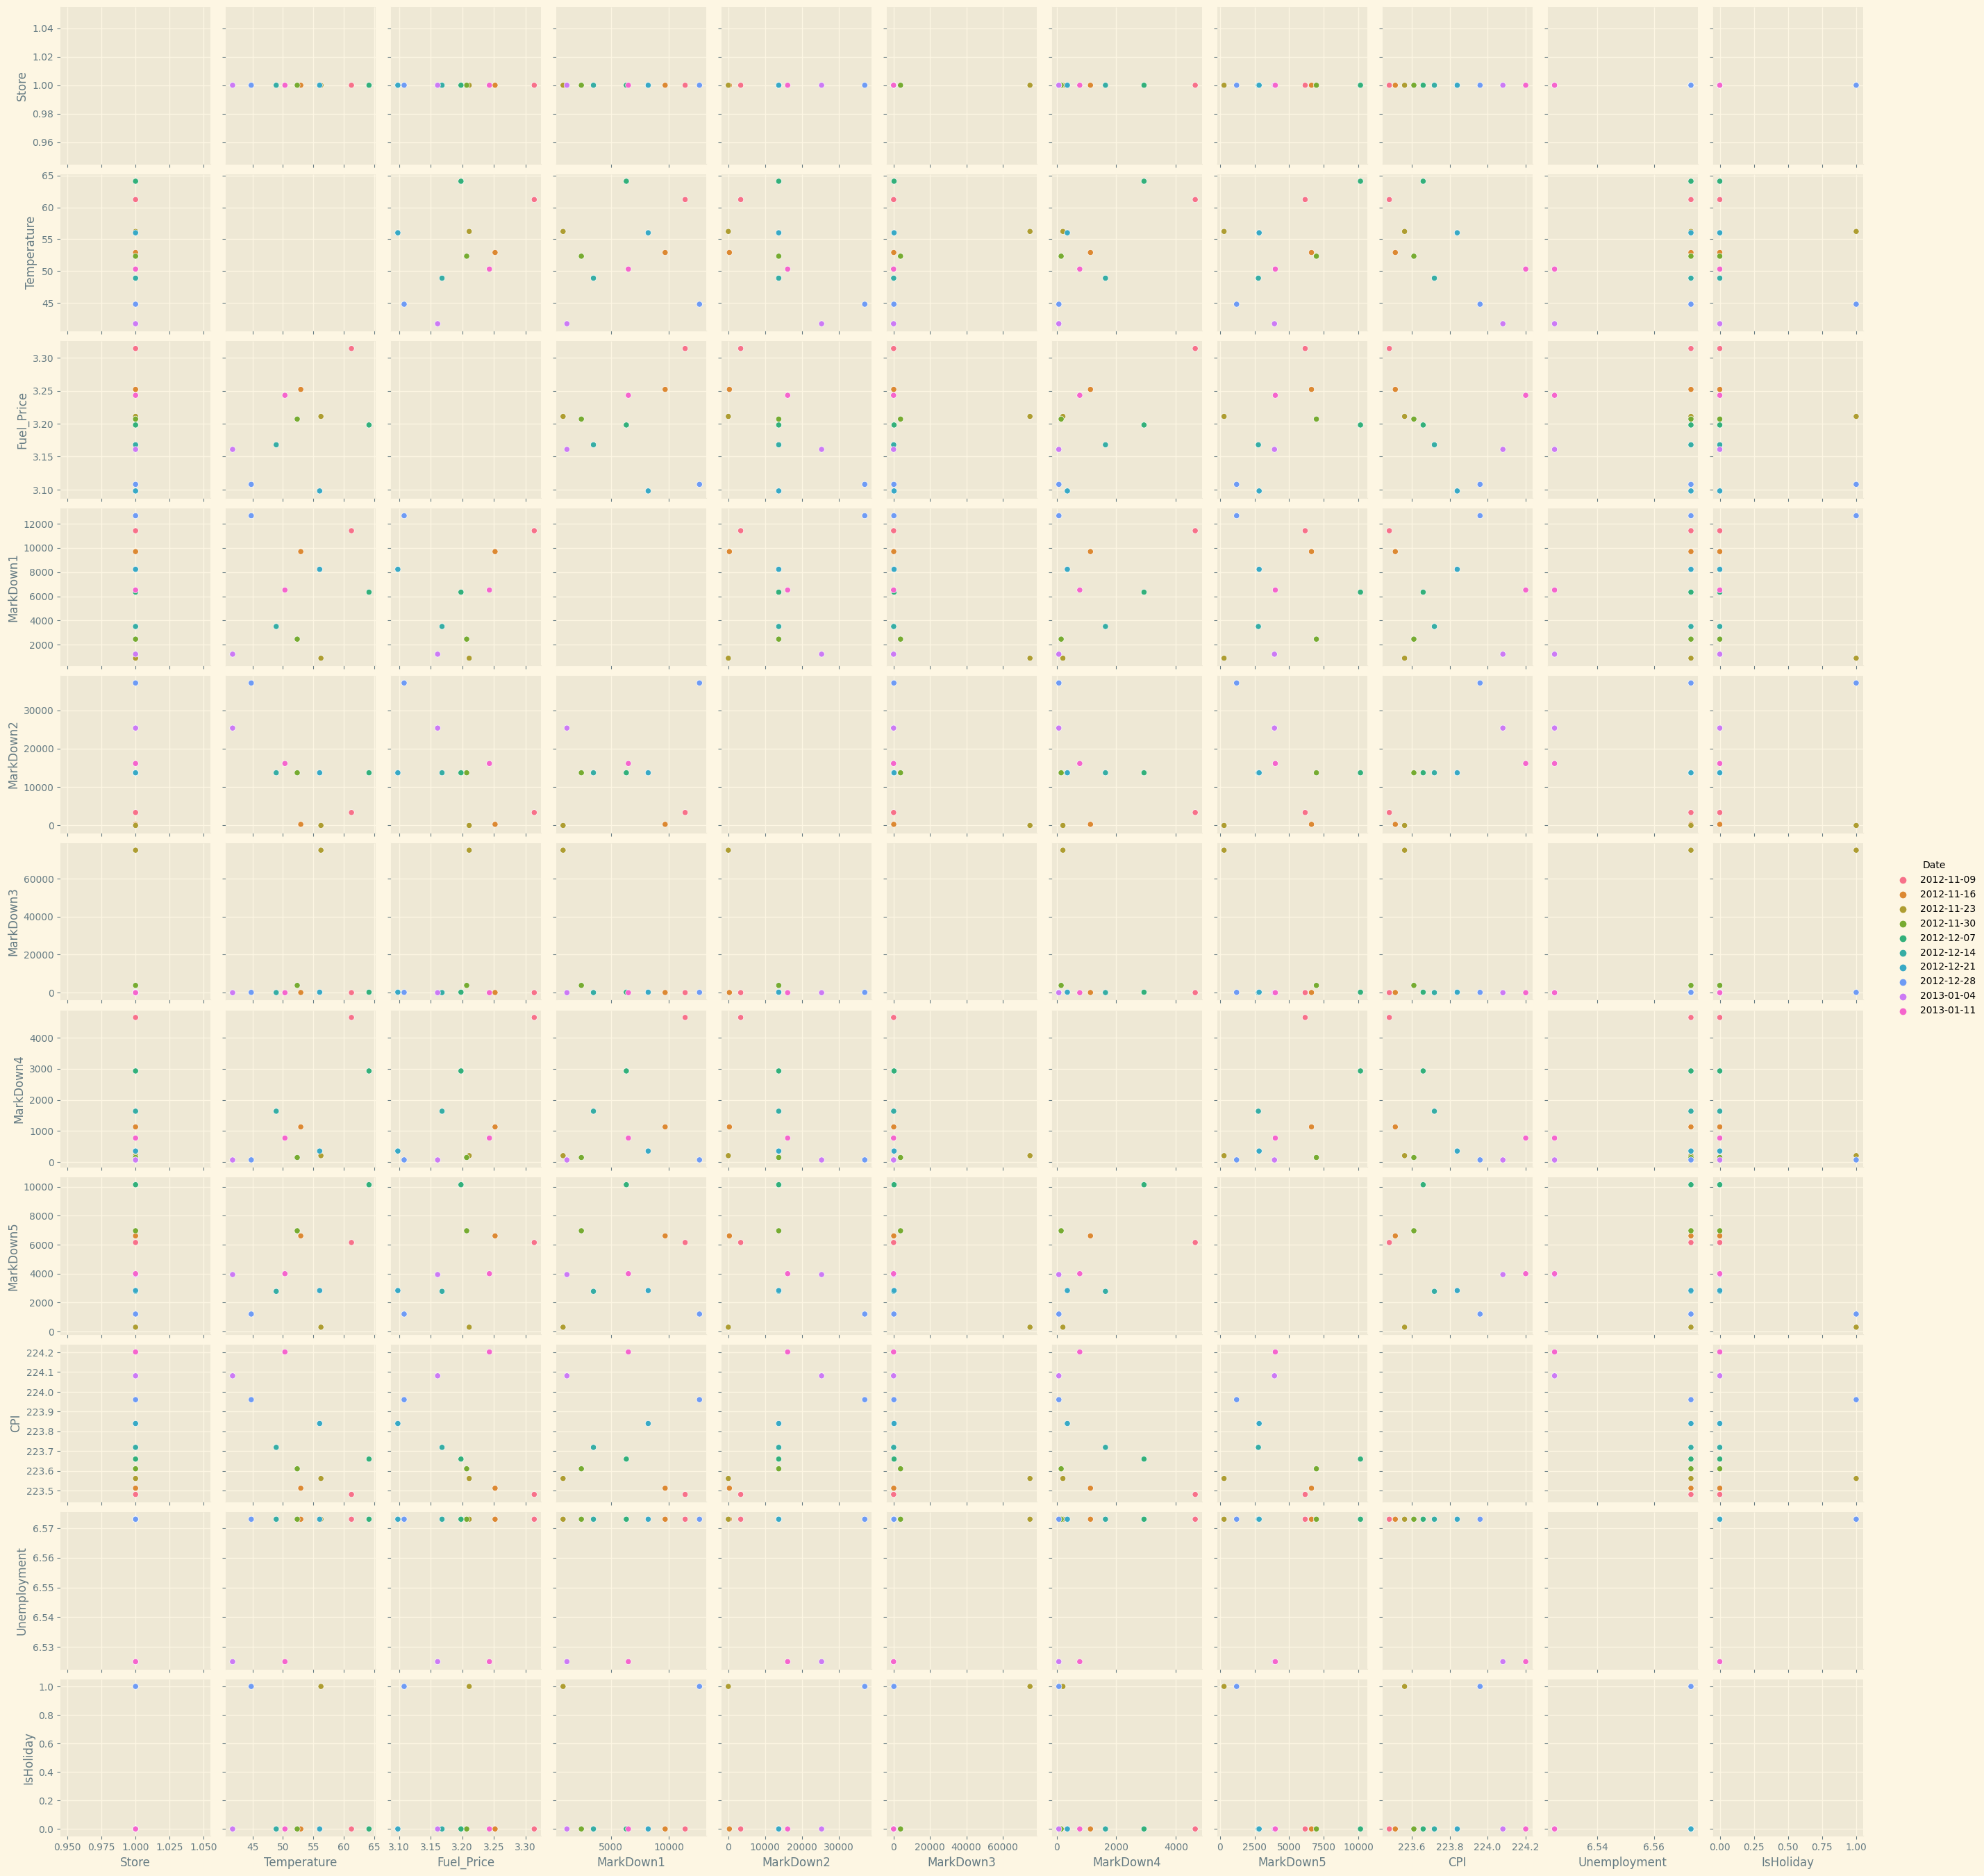

In [12]:
plt.figure(figsize=(20,15))
sns.pairplot(df,hue="Date")
plt.show()

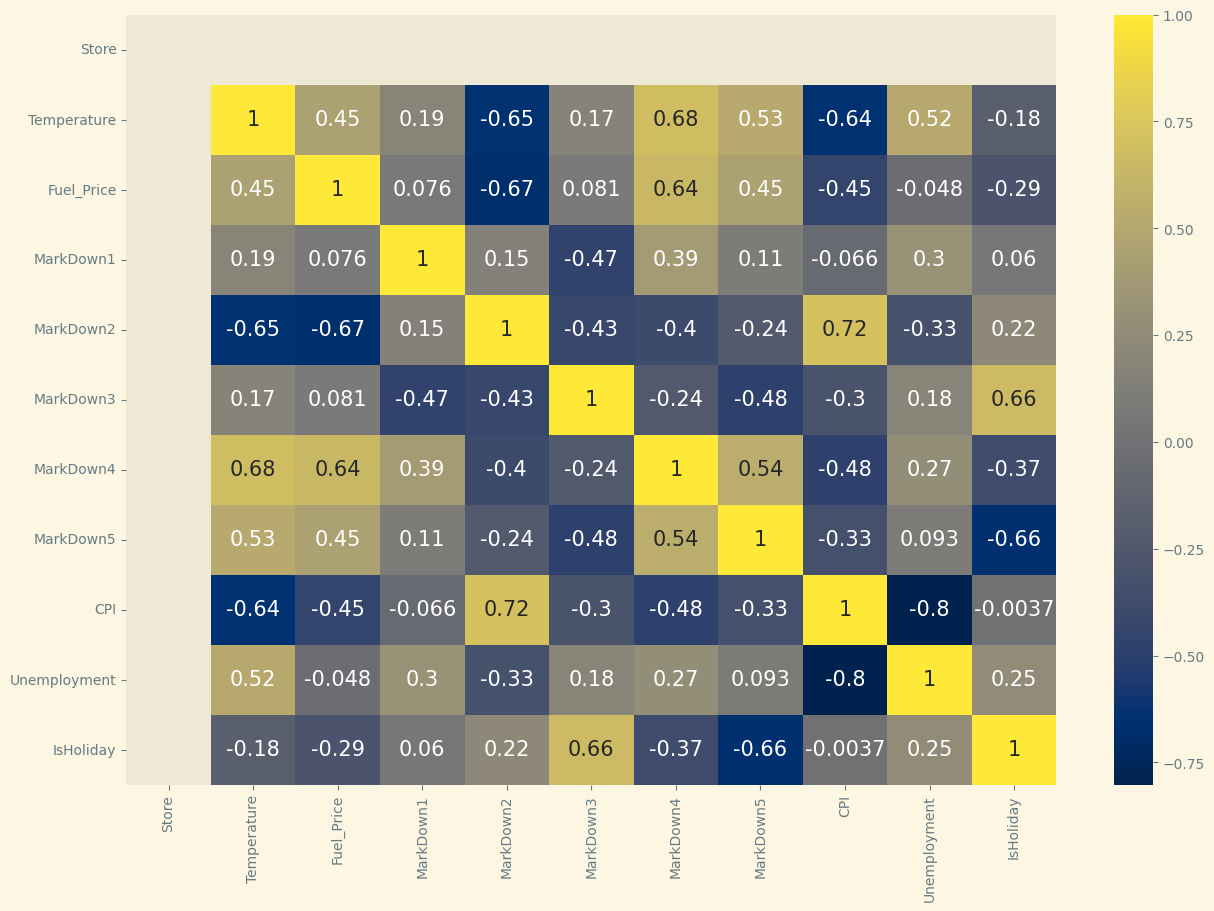

In [13]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='cividis',annot=True,annot_kws={"size":15})
plt.show()

In [ ]:
Tampilkan score dari model-model tersebut untuk classification

In [14]:
data = df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']]
label = df[['Date']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.2)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train,label_train)

KNeighborsClassifier()

In [16]:
predict_label = knn.predict(data_test)

In [17]:
akurasi = accuracy_score(label_test, predict_label)

In [18]:
print("Akurasi algoritma KNN dengan default paramater :", {akurasi})

Akurasi algoritma KNN dengan default paramater : {0.0}


In [19]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

GaussianNB()

In [20]:
predict_label = gnb.predict(data_test)

In [21]:
akurasi = accuracy_score(label_test, predict_label)

In [22]:
print("Akurasi algoritma Naive Bayes dengan default paramater :", {akurasi})

Akurasi algoritma Naive Bayes dengan default paramater : {0.0}


In [23]:
svc = SVC()
svc.fit(data_train,label_train)

SVC()

In [24]:
predict_label = svc.predict(data_test)

In [25]:
akurasi = accuracy_score(label_test, predict_label)

In [26]:
print("Akurasi algoritma Naive Bayes dengan default paramater :", {akurasi})

Akurasi algoritma Naive Bayes dengan default paramater : {0.0}


Tampilkan visualisasi dari model-model tersebut untuk regression.

In [27]:

data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

In [28]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

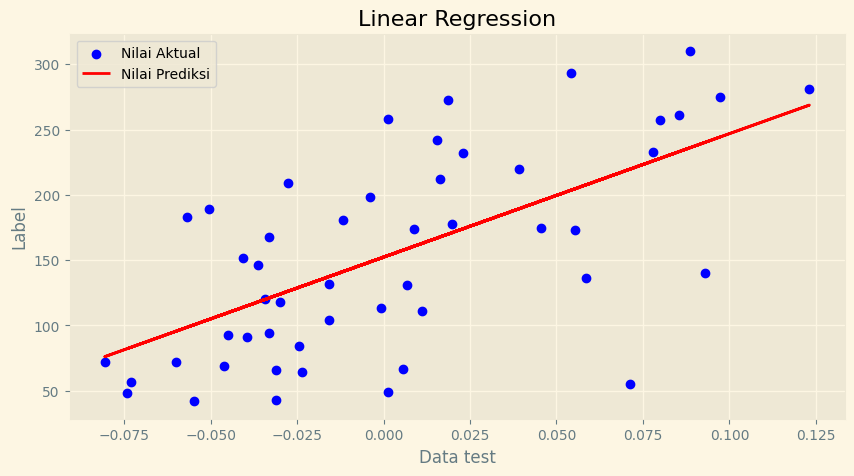

In [29]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(10,5))

plt.scatter(data_test2, label_test2, color="blue",label="Nilai Aktual")
plt.plot(data_test2, predict_label, color="red",label="Nilai Prediksi")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()